# Projet 3: Concevez une application au service de la santé publique (exploration)

## Table des matières: <a class="anchor" id="0"></a>

1. [Import des librairies et configurations générales](#library)
2. [Chargement et visualisation du dataset](#dataset)
3. [Description générale du dataset](#describe)
4. [Analyse univariée](#univar)
5. [Analyse bivariée](#bivar)
6. [Analyse multivariée](#multivar)
7. [Réduction dimensionnelle](#pca)

## Import des librairies et configurations générales <a class="anchor" id="library"></a>

In [244]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from scipy.stats import shapiro # Normalité distribution
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression # Régression linéaire
from statsmodels.formula.api import ols

In [ ]:
#plt.rcParams.keys()

In [2]:
# Configuration générale des graphiques
parameters = {'axes.labelsize': 13, 'axes.titlesize': 16, 'axes.titleweight': 'bold'}
plt.rcParams.update(parameters)

In [3]:
# Modification de l'affichage des lignes et colonnes pour plus de lisibilité
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

## Chargement et visualisation du dataset <a class="anchor" id="dataset"></a>

In [4]:
dtypes = {
    'code': object, 
    'product_name': object, 
    'brands_tags': object, 
    'labels_en': object, 
    'countries_en': object,
    'ingredients_text': object, 
    'allergens': object, 
    'additives_n': int, 
    'additives_en': object,
    'ingredients_from_palm_oil_n': int, 
    'nutriscore_grade': object, 
    'nova_group': object,
    'pnns_groups_1': object, 
    'pnns_groups_2': object, 
    'main_category_en': object, 
    'energy_kj_100g': float,
    'fat_100g': float, 
    'saturated-fat_100g': float, 
    'monounsaturated-fat_100g': float,
    'polyunsaturated-fat_100g': float, 
    'trans-fat_100g': float, 
    'cholesterol_100g': float,
    'carbohydrates_100g': float, 
    'sugars_100g': float, 
    'fiber_100g': float, 
    'proteins_100g': float,
    'salt_100g': float, 
    'sodium_100g': float, 
    'alcohol_100g': float, 
    'vitamin-a_100g': float,
    'vitamin-c_100g': float, 
    'vitamin-b1_100g': float, 
    'vitamin-b2_100g': float,
    'vitamin-pp_100g': float, 
    'potassium_100g': float, 
    'calcium_100g': float, 
    'iron_100g': float,
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': float,
    'nutrition-score-fr_100g': float
}

In [5]:
# Chargement du dataset nettoyé
data = pd.read_csv('data/openfoodfacts_clean.csv', sep = ',', dtype=dtypes, encoding ='utf-8')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,code,product_name,brands_tags,labels_en,countries_en,ingredients_text,allergens,additives_n,additives_en,ingredients_from_palm_oil_n,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,energy_kj_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,00000000000003429145,l.casei,unknown,none,spain,"leche semidesnatada, azucar 6.9% leche desnatada en polva, fermentos lacticos (contiene lactobacidus casei), vitaminas (b6 y d).",none,0,none,0,unknown,unknown,milk and dairy products,milk and yogurt,drinkable yogurts,389.0,1.4,0.9,0.000000,0.145066,0.0,0.011,9.8,9.8,0.0,2.7,0.100,0.0400,0.0,0.000062,0.120,0.000113,0.000180,0.120,0.158,0.118,0.00000,0.000000,6.842730
1,0000000000100,moutarde au moût de raisin,courte-paille,fr:delois-france,france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),en:mustard,0,none,0,d,unknown,fat and sauces,dressings and sauces,mustards,936.0,8.2,2.2,2.679799,1.957183,0.0,0.000,29.0,22.0,0.0,5.1,4.600,1.8400,0.0,0.000054,1.500,0.000000,0.000391,1.500,0.167,0.000,0.00000,0.000000,18.000000
2,000000000080,pur jus de pomme,unknown,none,france,unknown,none,0,none,0,unknown,unknown,beverages,fruit juices,squeezed apple juices,264.0,0.0,0.0,0.000000,0.000000,0.0,0.000,15.5,15.5,0.0,0.2,0.000,0.0000,0.0,0.000000,0.001,0.000165,0.000195,0.001,0.145,0.008,0.00015,6.245533,6.132166
3,0000000000949,salade de carottes râpées,unknown,none,france,unknown,none,0,none,0,b,unknown,composite foods,one-dish meals,seasoned shredded carrots,134.0,0.3,0.1,0.000000,0.000000,0.0,0.009,5.3,3.9,1.4,0.9,0.420,0.1680,0.0,0.000048,0.910,0.000000,0.000189,0.910,0.165,0.028,0.00085,6.299881,1.000000
4,0000000001137,baguette parisien,unknown,none,france,unknown,none,0,none,0,unknown,unknown,composite foods,sandwiches,ham sandwiches,929.0,3.3,2.1,0.000000,0.795754,0.0,0.029,38.4,1.8,1.9,11.7,0.678,0.2712,0.0,0.000114,1.360,0.000380,0.000237,1.360,0.172,0.091,0.00153,6.519494,9.062178


## Description générale du dataset <a class="anchor" id="describe"></a>

### Description des variables <a class="anchor" id="describe_var"></a>

In [7]:
def describe_variables(data):
    ''' fonction qui prend un dataframe en entrée, et retourne un récapitulatif qui contient le nom des variables, 
    leur type, un exemple de modalité, le nombre total de lignes, le nombre et pourcentage de valeurs distinctes, 
    le nombre et pourcentage de valeurs non manquantes et de valeurs manquantes (NaN) et les principales statistiques 
    pour les variables numériques (moyenne, médiane, distribution, variance, écart type, minimum, quartiles et 
    maximum)'''

    # Choix du nom des variables à afficher
    df = pd.DataFrame(columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', '% distinct', 
                                 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 'Median', 'Skew', 'Kurtosis', 
                                 'Variance', 'Std', 'Min','25%','75%','Max'])
    
    # Pour chaque colonne du dataframe
    for column in data.columns:
        
        # Définition des variables
        var_type = data[column].dtypes # type de la variable (object, float, int...)
        example = data[data[column].notna()][column].iloc[0] # premier élément notNA
        #example = [data[data[column].notna()][column].iloc[0] if data[column].isna().sum() != len(data[column]) else 0]
        nb_raw = len(data[column]) # nombre total de lignes
        count = len(data[column])- data[column].isna().sum() # nombre de valeurs non manquantes
        percent_count = round(data[column].notnull().mean(),4)*100 # % de valeurs non manquantes
        distinct = data[column].nunique() # nombre de modalités que peut prendre la variable
        percent_distinct = round(data[column].nunique()/len(data[column]),4)*100 # % de valeurs distinctes
        missing = data[column].isna().sum() # nombre de valeurs manquantes
        percent_missing = round(data[column].isna().mean(),4)*100 # % de valeurs manquantes
        
        
        
        # Pour les variables de type 'int' ou 'float': on remplit toutes les colonnes
        if var_type == 'int' or var_type == 'float': 
            df = df.append(pd.DataFrame([[column, var_type, example, nb_raw, distinct, percent_distinct, count,
                                          percent_count,missing, percent_missing,
                                          round(data[column].mean(),2),round(data[column].median(),2),
                                          round(data[column].skew(),2),round(data[column].kurtosis(),2),
                                          round(data[column].var(),2),round(data[column].std(),2),
                                          round(data[column].min(),2),round(data[column].quantile(0.25),2),
                                          round(data[column].quantile(0.75),2),data[column].max()]], 
                                        columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', 
                                                   '% distinct', 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 
                                                   'Median', 'Skew', 'Kurtosis', 'Variance', 'Std', 'Min','25%',
                                                   '75%', 'Max']))
            
        
        
        # Pour les variables d'un autre type: on ne remplit que les variables de compte    
        else:            
            df = df.append(pd.DataFrame([[column, var_type, example, nb_raw, distinct, percent_distinct, count,
                                          percent_count,missing, percent_missing,
                                          '','','','','','','','','','']], 
                                        columns = ['Variable name', 'Variable type', 'Example', 'Raws', 'Distinct', 
                                                   '% distinct', 'Not NaN', '% Not NaN', 'NaN', '% NaN', 'Mean', 
                                                   'Median', 'Skew', 'Kurtosis', 'Variance', 'Std', 'Min', '25%', 
                                                   '75%', 'Max']))
            
    return df.reset_index(drop = True)

In [8]:
describe_variables(data)

,Variable name,Variable type,Example,Raws,Distinct,% distinct,Not NaN,% Not NaN,NaN,% NaN,Mean,Median,Skew,Kurtosis,Variance,Std,Min,25%,75%,Max
0,code,object,00000000000003429145,633600,633600,100.00,633600,100.0,0,0.0,,,,,,,,,,
1,product_name,object,l.casei,633600,313081,49.41,633597,100.0,3,0.0,,,,,,,,,,
2,brands_tags,object,unknown,633600,68350,10.79,633600,100.0,0,0.0,,,,,,,,,,
3,labels_en,object,none,633600,33774,5.33,633600,100.0,0,0.0,,,,,,,,,,
4,countries_en,object,spain,633600,2625,0.41,633600,100.0,0,0.0,,,,,,,,,,
5,ingredients_text,object,"leche semidesnatada, azucar 6.9% leche desnatada en polva, fermentos lacticos (contiene lactobacidus casei), vitaminas (b6 y d).",633600,287674,45.40,633600,100.0,0,0.0,,,,,,,,,,
6,allergens,object,none,633600,3882,0.61,633600,100.0,0,0.0,,,,,,,,,,
7,additives_n,int32,0,633600,32,0.01,633600,100.0,0,0.0,0.99,0.0,3.35,15.45,4.79,2.19,0,0.0,1.0,41
8,additives_en,object,none,633600,47151,7.44,633600,100.0,0,0.0,,,,,,,,,,
9,ingredients_from_palm_oil_n,int32,0,633600,3,0.00,633600,100.0,0,0.0,0.01,0.0,14.45,223.33,0.01,0.08,0,0.0,0.0,2


### Données manquantes et taux de complétion <a class="anchor" id="data_nan"></a>

In [9]:
def shape_total_nan(dataframe):
    '''Fonction qui retourne le nombre de lignes, de variables, le nombre total de valeurs manquantes et
    le pourcentage associé'''
    missing = dataframe.isna().sum().sum()
    missing_percent = round(missing / (dataframe.shape[0] * dataframe.shape[1]) * 100, 2)
    
    print(f"Nombre de lignes: {dataframe.shape[0]}")
    print(f"Nombre de colonnes: {dataframe.shape[1]}")
    print(f"Nombre total de NaN du dataset: {missing}")
    print(f"% total de NaN du dataset: {missing_percent}%")  

In [10]:
shape_total_nan(data)

Nombre de lignes: 633600
Nombre de colonnes: 39
Nombre total de NaN du dataset: 5
% total de NaN du dataset: 0.0%


In [11]:
# 5 valeurs manquantes sont apparues lors de l'import du csv. Nous les supprimons
data.dropna(inplace = True)

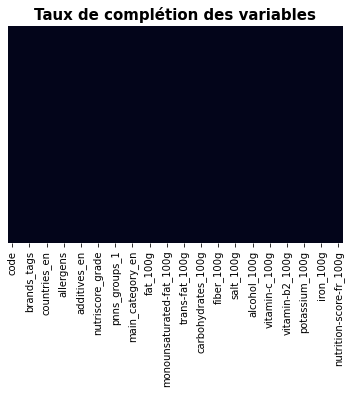

In [12]:
# Visualisation générale des données manquantes
plt.figure(figsize=(6,4))
plt.title('Taux de complétion des variables', fontweight = 'bold', fontsize = 15)
sns.heatmap(data.isna(), yticklabels = False, cbar = False);

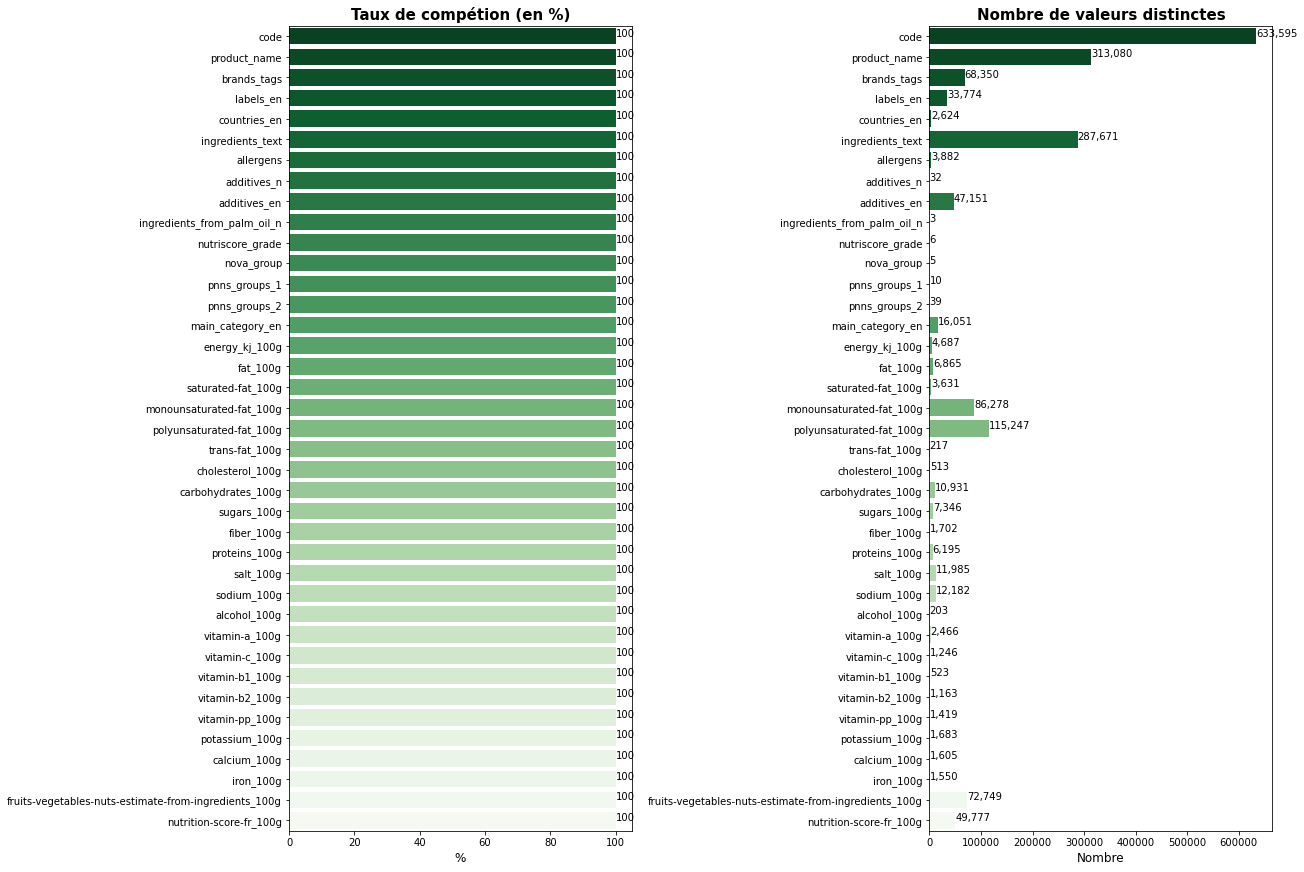

In [13]:
# Initialisation de la grille avec 1 ligne et 2 colonnes
fig = plt.figure(figsize=(18,12), constrained_layout=True)
gs = GridSpec(nrows=1, ncols=2, figure=fig)

# Premier graphique
ax1 = fig.add_subplot(gs[0,0]) # emplacement dans la grille
ax1 = sns.barplot(y = 'Variable name', x = '% Not NaN', data = describe_variables(data), palette='Greens_r')
plt.title('Taux de compétion (en %)', fontweight = 'bold', fontsize = 15)
plt.ylabel("", fontsize = 12)
plt.xlabel("%", fontsize = 12)

for item in ax1.get_xticklabels(): # rotation axe des abscisses
    item.set_rotation(0)
        
for p in ax1.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax1.annotate(etiquette,(x,y))


# Deuxième graphique
ax2 = fig.add_subplot(gs[0,1]) # emplacement dans la grille
ax2 = sns.barplot(y = 'Variable name', x = 'Distinct', data = describe_variables(data), palette='Greens_r')
plt.title('Nombre de valeurs distinctes', fontweight = 'bold', fontsize = 15)
plt.ylabel("", fontsize = 12)
plt.xlabel("Nombre", fontsize = 12)

for item in ax2.get_xticklabels(): # rotation axe des abscisses
    item.set_rotation(0)
    
for p in ax2.patches:
    etiquette ='{:,.0f}'.format(p.get_width())
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax2.annotate(etiquette,(x,y))

## Analyse univariée <a class="anchor" id="univar"></a>

### Variables quantitatives <a class="anchor" id="quanti"></a>

#### Discrètes

In [14]:
# Fonction qui génère le tableaux des fréquences et fréquences cumulées

def frequences_cumulees(dataframe, col):
    
    effectifs = data[col].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [col]) # création du tableau à partir des modalités
    tab["n"] = np.round(effectifs.values, 0)
    tab["f"] = np.round(tab["n"] / len(data), 3) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(col) # tri des valeurs de la variable X (croissant)
    tab["F"] = np.round(tab["f"].cumsum(), 3) # cumsum calcule la somme cumulée

    return tab

In [34]:
# Fonction qui génère 3 graphiques: un diagramme en bâtons, un diagramme des effectifs cumulés et un 
# tableau des fréquences

def univariate_plots_discrete(dataframe, col):    
    
    # Initialisation de la grille avec 1 ligne et 3 colonnes
    fig = plt.figure(figsize=(15, 4), constrained_layout=True)
    spec = fig.add_gridspec(ncols=3, nrows=1)
    fig.suptitle(f'{col} distribution', fontsize=20, fontweight ='bold')
    
    # Premier graphique
    ax0 = fig.add_subplot(spec[0, 0])
    ax0 = dataframe[col].value_counts(normalize=True).plot(kind='bar',width=0.5, color = '#769ac9', ax = ax0)
    plt.title('Diagramme en bâtons', fontsize = 12)# titre du plot   
    
    # Deuxième graphique
    ax1 = fig.add_subplot(spec[0, 1])
    ECDF(dataframe[col])
    ax1 = plt.plot(ecdf.x,ecdf.y)
    plt.title('Diagramme des effectifs cumulés', fontsize = 12)# titre du plot  
    
    # Troisième graphique
    tab_freq = frequences_cumulees(dataframe, col)
    ax2 = fig.add_subplot(spec[0, 2])
    ax2.table(cellText = tab_freq.values, rowLabels = tab_freq.index, colLabels = tab_freq.columns, cellLoc = 'center', 
                    rowLoc = 'center', loc='center')
    ax2.axis("off")
    plt.title('Tableau des fréquences', fontsize = 12)# titre du plot  
    
    plt.show()
    
    print("-"*50)
    print(f'Moyenne {col} : {dataframe[col].mean()}')
    print(f'Médiane {col} : {dataframe[col].median()}')
    print(f'Mode {col} : {dataframe[col].mode()[0]}')
    print(f'Ecart-type {col} : {dataframe[col].std()}')
    print(f'Skewness {col} : {dataframe[col].skew()}') # mesure asymétrie
    print(f'Kurtosis {col} : {dataframe[col].kurtosis()}') # mesure d'applatissement
    print("-"*50)

In [65]:
# Fonction qui génère 3 graphiques: un diagramme en bâtons, un diagramme des effectifs cumulés 
# et un tableau des fréquences

def univariate_plots_discrete(dataframe, col):    
    
    # Initialisation de la grille avec 2 ligne et 2 colonnes
    fig = plt.figure(figsize=(15, 10), constrained_layout=True)
    spec = fig.add_gridspec(ncols=2, nrows=2)
    fig.suptitle(f'{col} distribution', fontsize=20, fontweight ='bold')
    
    # Premier graphique: diagramme en bâtons
    ax0 = fig.add_subplot(spec[0, 0])
    ax0 = dataframe[col].value_counts(normalize=True).plot(kind='bar',width=0.5, color = '#769ac9', ax = ax0)
    plt.title('Diagramme en bâtons', fontsize = 12)# titre du plot   
    
    # Deuxième graphique: diagramme des effectifs cumulés
    ax1 = fig.add_subplot(spec[0, 1])
    ECDF(dataframe[col])
    ax1 = plt.plot(ecdf.x,ecdf.y)
    plt.title('Diagramme des effectifs cumulés', fontsize = 12)# titre du plot  
    
    # Troisième graphique: tableau des fréquences
    tab_freq = frequences_cumulees(dataframe, col)
    ax2 = fig.add_subplot(spec[1, :])
    ax2.table(cellText = tab_freq.values, rowLabels = tab_freq.index, colLabels = tab_freq.columns, cellLoc = 'center', 
                    rowLoc = 'center', loc='upper center')
    ax2.axis("off")
    plt.title('Tableau des fréquences', fontsize = 12)# titre du plot  
    
    plt.show()
    
    print("-"*50)
    print(f'Moyenne {col} : {dataframe[col].mean()}')
    print(f'Médiane {col} : {dataframe[col].median()}')
    print(f'Mode {col} : {dataframe[col].mode()[0]}')
    print(f'Ecart-type {col} : {dataframe[col].std()}')
    print(f'Skewness {col} : {dataframe[col].skew()}') # mesure asymétrie
    print(f'Kurtosis {col} : {dataframe[col].kurtosis()}') # mesure d'applatissement
    print("-"*50)
    print()
    print()

<div class="alert alert-block alert-info">
    <p> Comment gérer la taille du tableau des fréquences? Le remonter? </p>
    <p> OK moyenne etc pour var discrètes? </p>
    <p> Outliers additives à traiter </p>
</div>

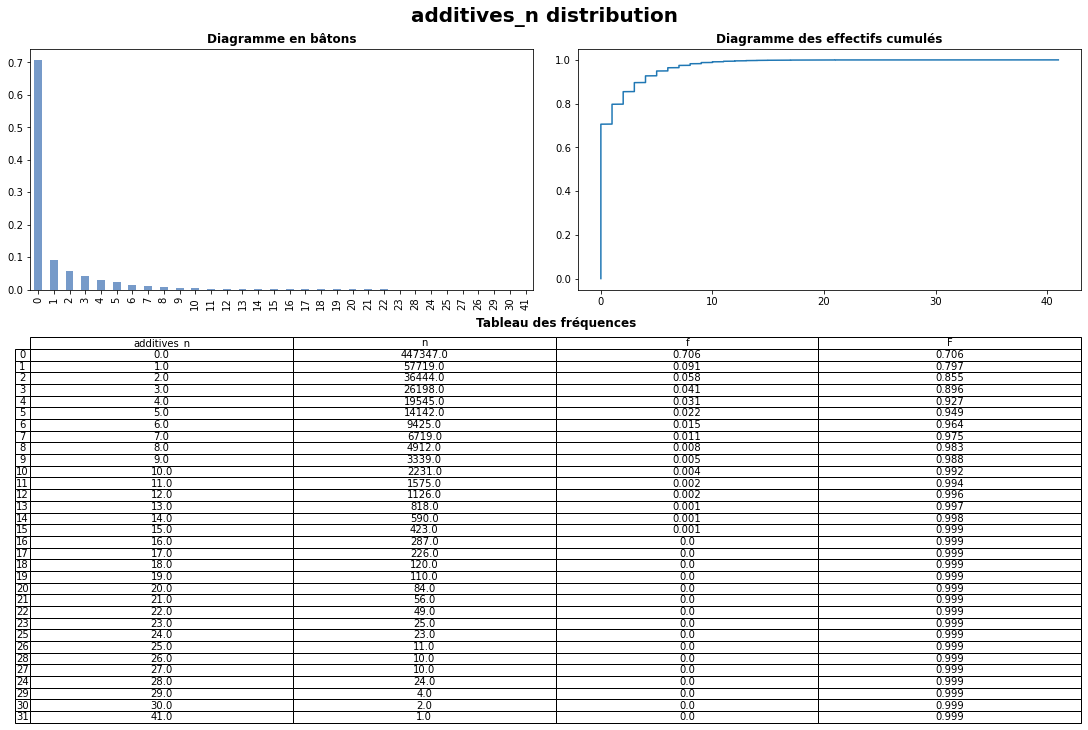

--------------------------------------------------
Moyenne additives_n : 0.9925046756997766
Médiane additives_n : 0.0
Mode additives_n : 0
Ecart-type additives_n : 2.1875898675755128
Skewness additives_n : 3.3469923012483886
Kurtosis additives_n : 15.451201917090902
--------------------------------------------------




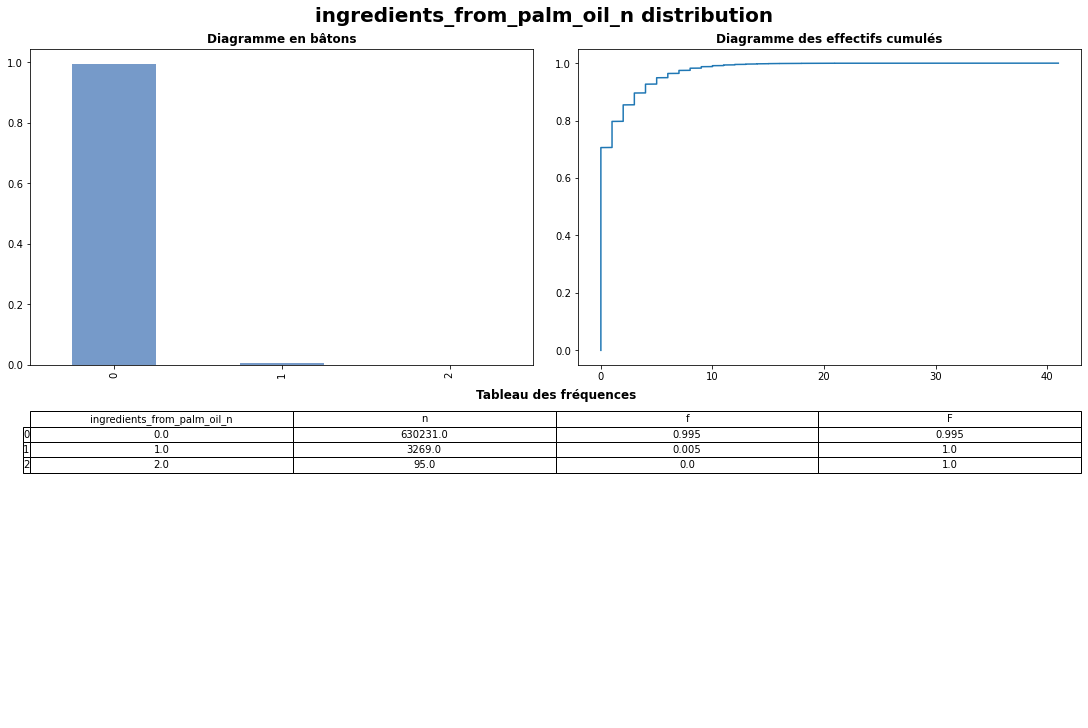

--------------------------------------------------
Moyenne ingredients_from_palm_oil_n : 0.0054593233848120645
Médiane ingredients_from_palm_oil_n : 0.0
Mode ingredients_from_palm_oil_n : 0
Ecart-type ingredients_from_palm_oil_n : 0.0756928287192789
Skewness ingredients_from_palm_oil_n : 14.446268259612296
Kurtosis ingredients_from_palm_oil_n : 223.06122780856913
--------------------------------------------------




In [66]:
col_quanti_discr = data.select_dtypes(include='int').columns

for c in col_quanti_discr:
    univariate_plots_discrete(data, c)

Les distributions de ces deux variables quantitatives discrètes montrent un pic à 0.

#### Continues

##### Mesures de tendance centrale

In [71]:
# Fonction qui permet d'afficher du texte dans chaque histogramme
def draw_text_hist(ax):
    from matplotlib.offsetbox import AnchoredText
    at = AnchoredText(f'Moy = {round(data[c].mean(),2)} \nMed = {round(data[c].median(),2)}, \nSkew = {round(data[c].skew(),2)}',
                      loc=1, prop=dict(size=12), frameon=True)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

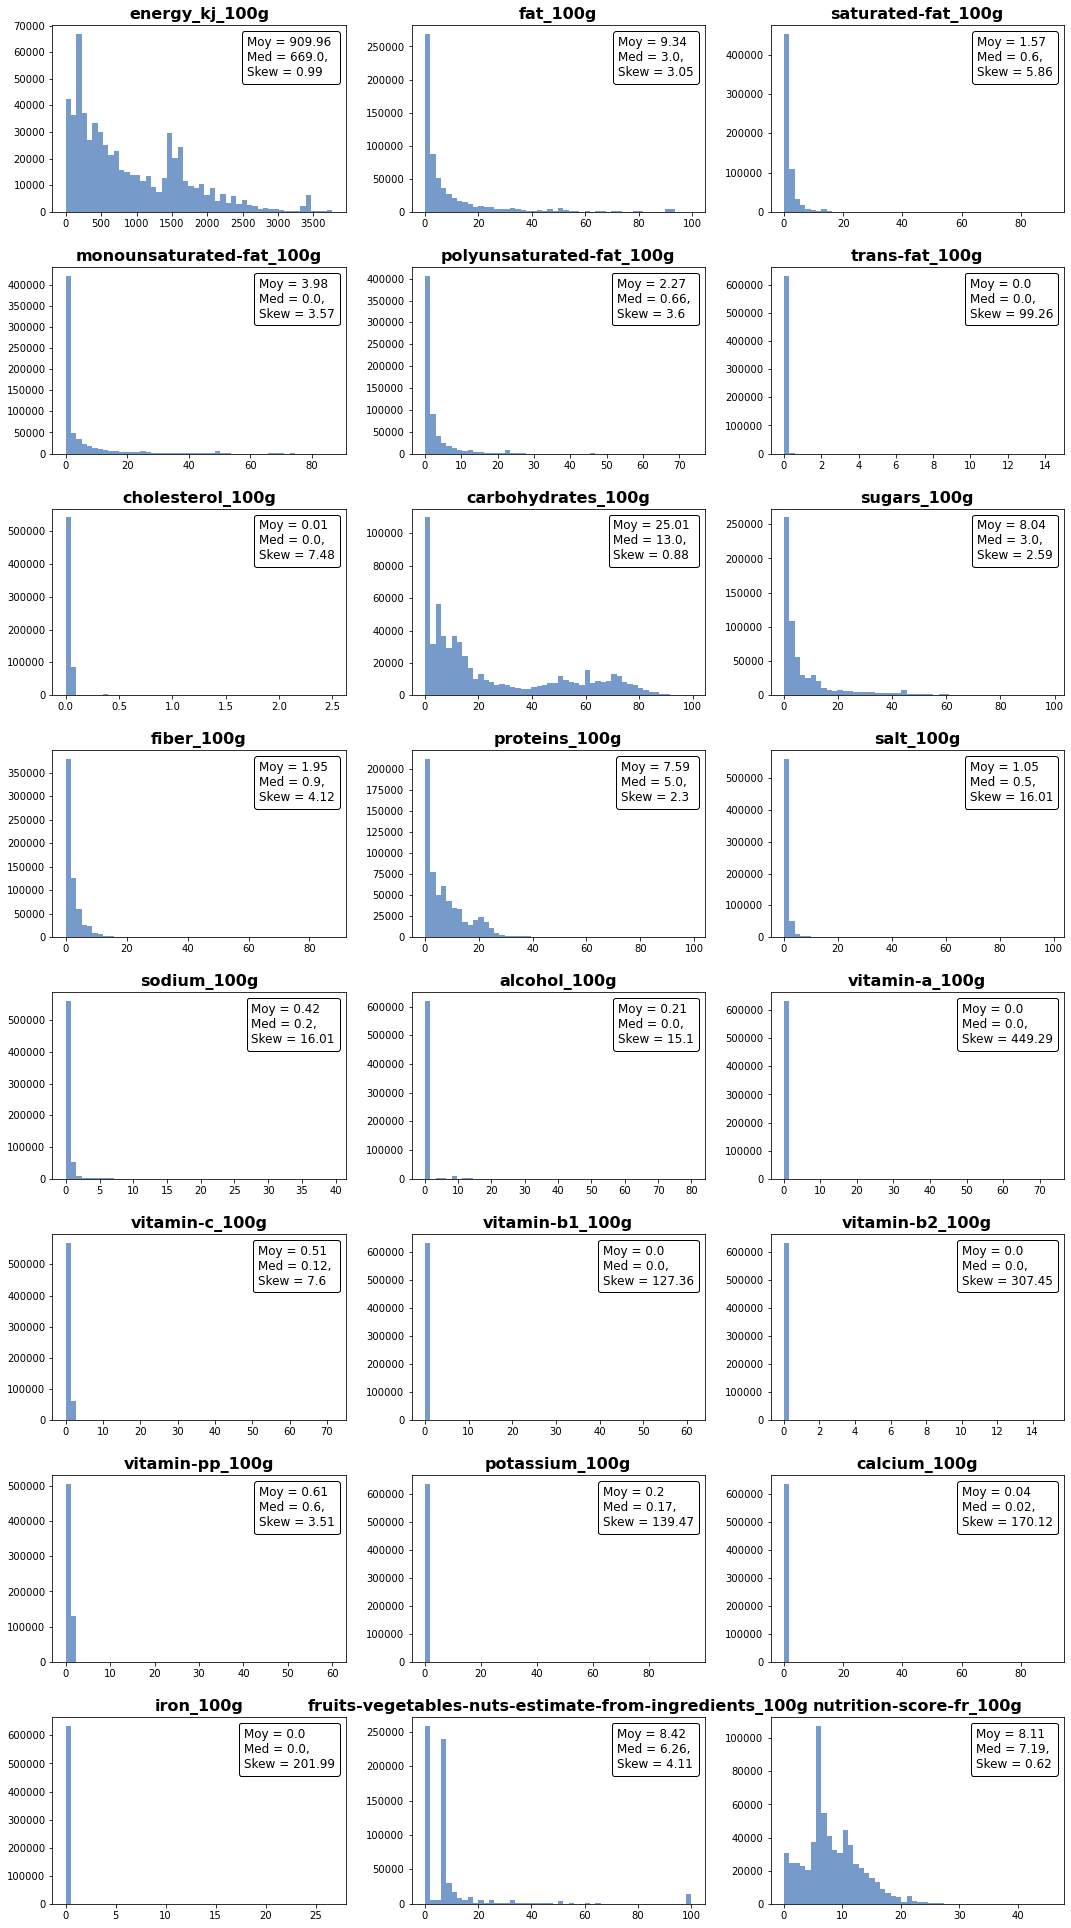

In [72]:
# Affichage de l'histogramme de chaque variable quantitative

col_quanti = data.select_dtypes(include='float').columns
                   

fig = plt.figure(figsize=(15,30))

for i, c in enumerate(col_quanti,1):
    ax = fig.add_subplot(9,3,i)
    ax.hist(data[c], bins = 50, color = '#769ac9')
    ax.set_title(c)
    draw_text_hist(ax)
    ax.title.set_fontweight('bold')
    
plt.tight_layout(w_pad=2, h_pad=2)

- La grande majorité des distributions montre un pic aux alentours de la valeur 0. Il ne s'agit probablement pas de valeurs erronnées car certains produits peuvent ne pas contenir tel ou tel nutriment (exemple de l'huile qui ne contient pas de sucres etc). Cependant, lors de la complétion des valeurs manquantes, il aurait été intéressant d'avoir l'avis d'un nutritionniste afin d'être sûr de les traiter correctement.
- Certaines distributions sont bimodales comme l'énergie ou les fruits/légumes/oléagineux.
- La plupart des distributions ne sont pas symétriques mais étalée vers la droite.

##### Mesures de dispersion

In [69]:
# Fonction qui permet d'afficher du texte dans chaque histogramme
def draw_text_box(ax):
    from matplotlib.offsetbox import AnchoredText
    at = AnchoredText(f'Ecart-type = {round(data[c].std(),2)} \nMin = {round(data[c].min(),2)} \nMax = {round(data[c].max(),2)}',
                      loc=1, prop=dict(size=12), frameon=True)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

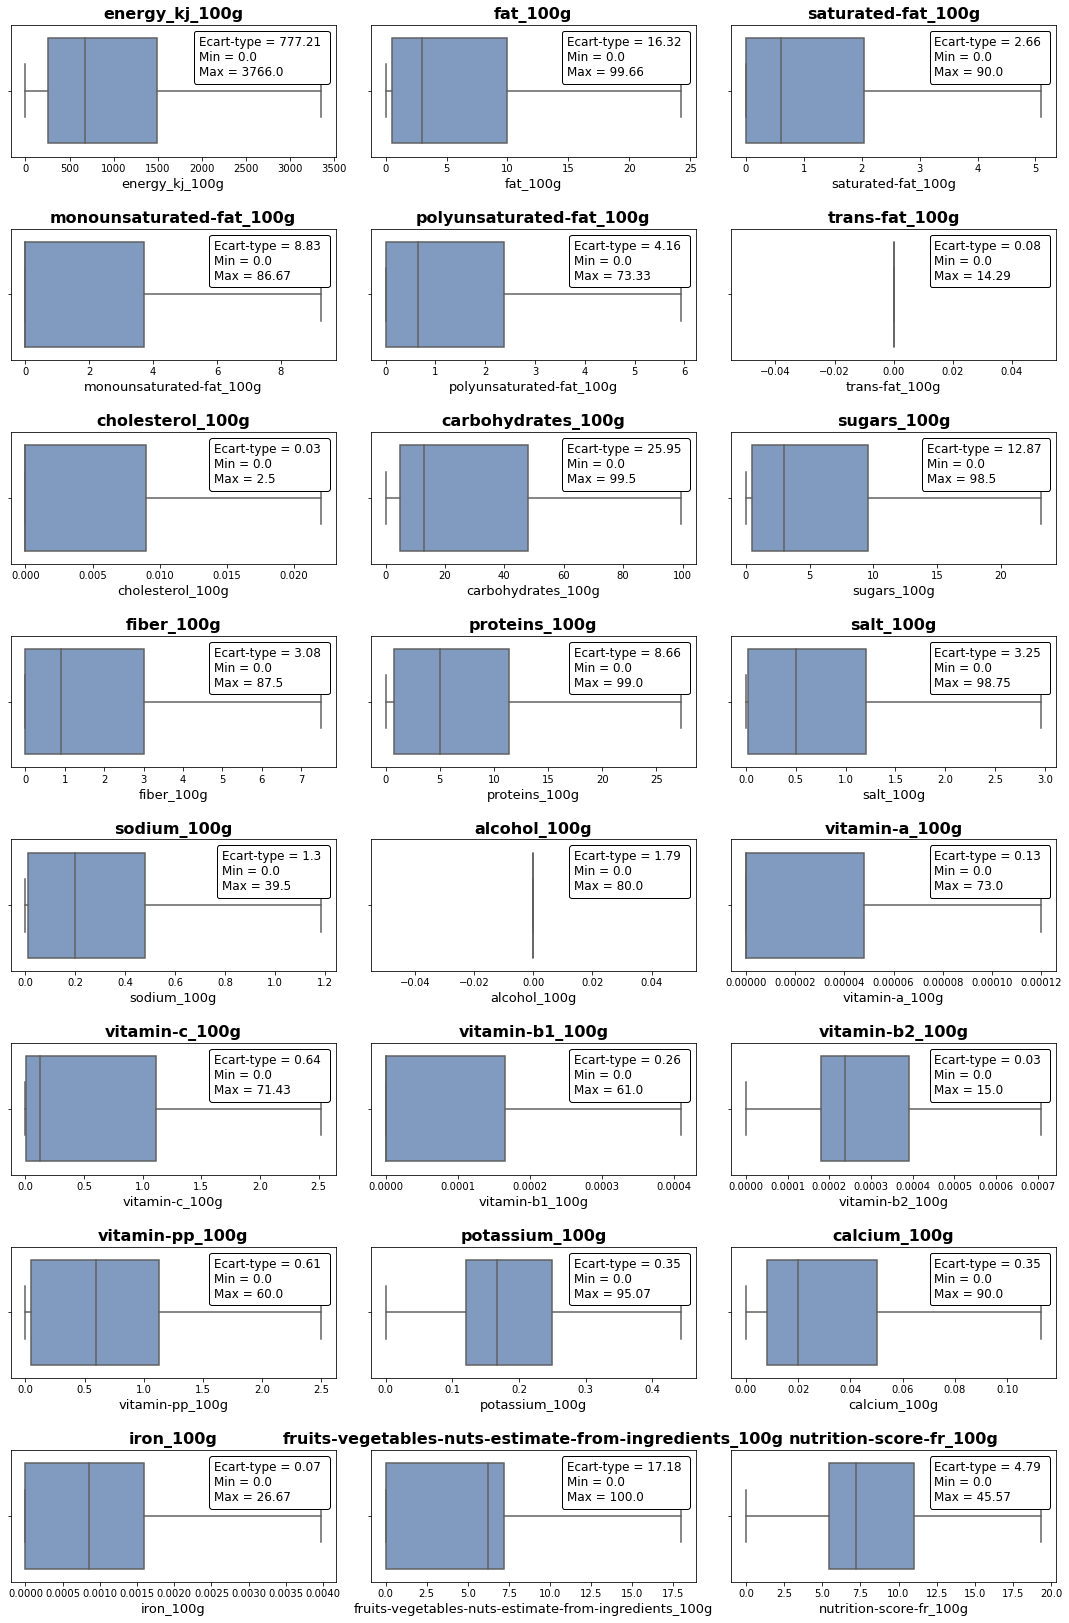

In [70]:
fig = plt.figure(figsize=(15,25))

for i, c in enumerate(col_quanti,1):
    ax = fig.add_subplot(9,3,i)
    ax = sns.boxplot(data = data, x = c, showfliers=False, color = '#769ac9')
    ax.set_title(c)
    draw_text_box(ax)
    ax.title.set_fontweight('bold')
    
plt.tight_layout(w_pad=2, h_pad=2)

##### Test de normalité

Les histogrammes et boites à moustaches nous permettent de penser qu'aucune des variables est normalement distribuée.
Pour vérifier cette hypothèse, nous allons utiliser le test de Shapiro-Wilk.

In [73]:
def test_normalite(data):
    data = data
    # Test de Shapiro-Wilk
    stat, p = shapiro(data)
    p = round(p, 3)
    if p > 0.05:
        result = f'Distribution Normale (pvalue = {p})'
    else:
        result = f'Distribution non Normale (pvalue = {p})'
    
    return result

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


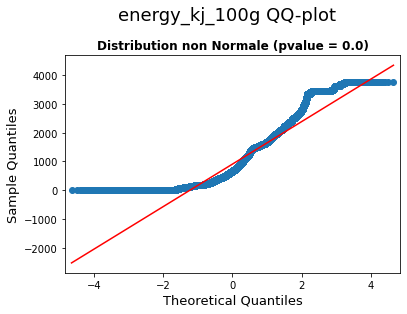

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


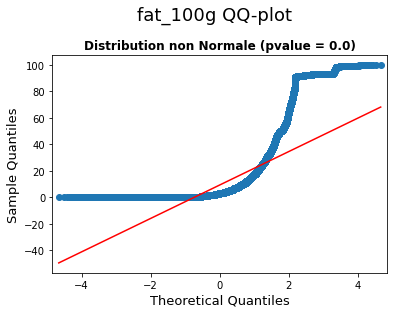

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


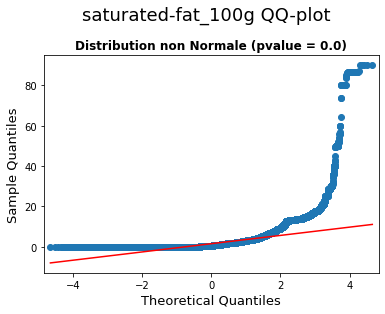

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


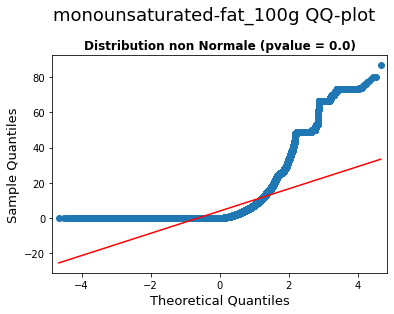

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


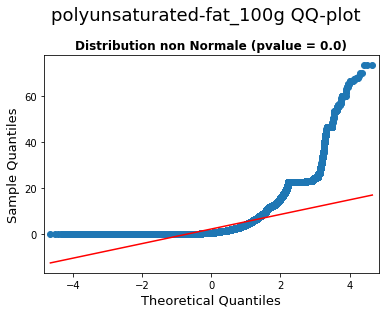

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


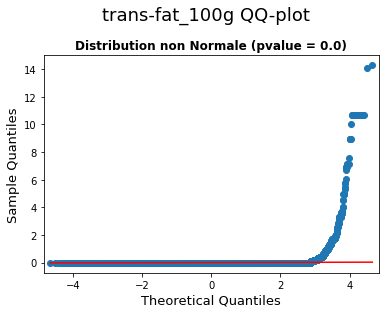

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


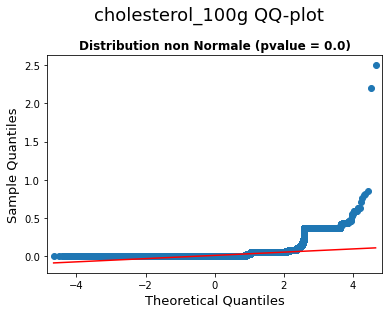

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


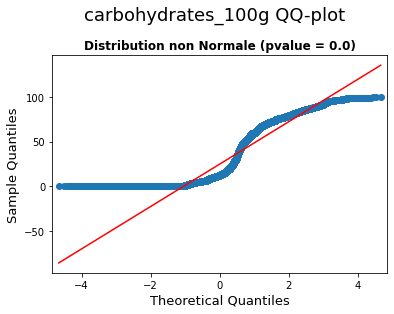

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


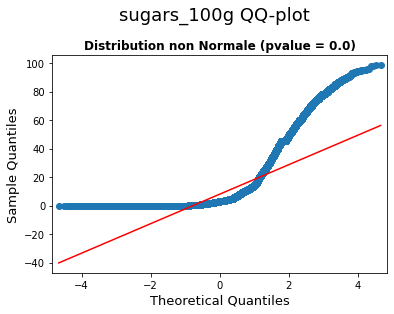

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


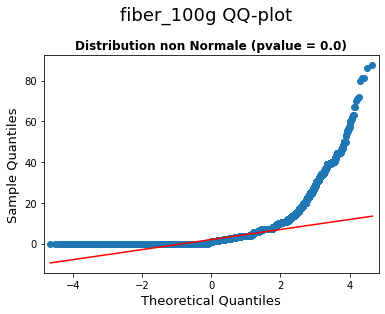

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


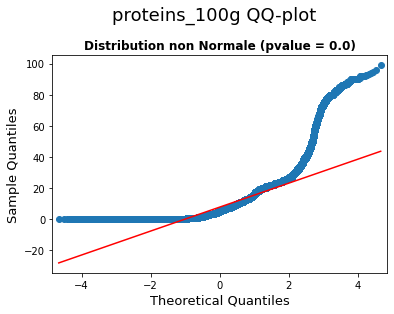

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


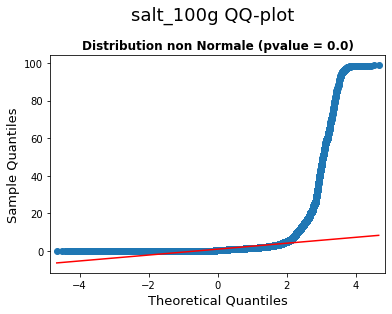

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


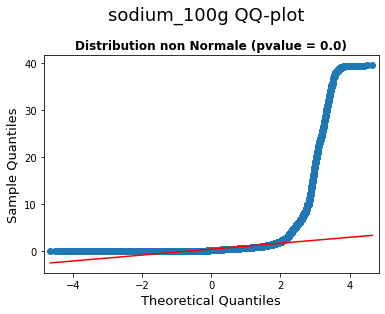

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


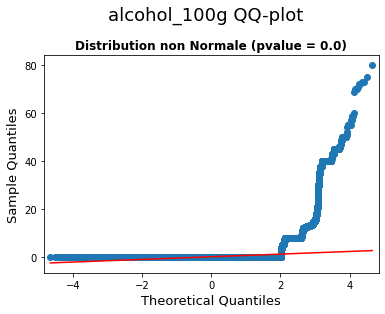

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


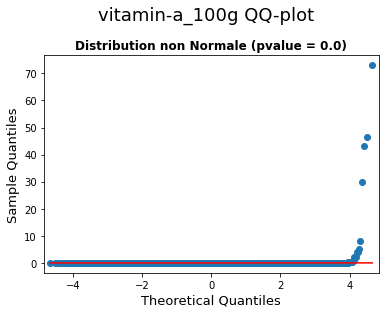

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


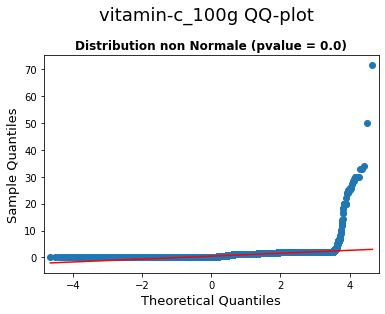

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


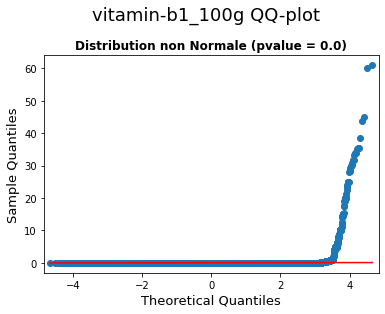

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


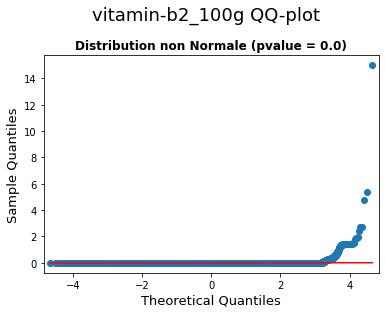

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


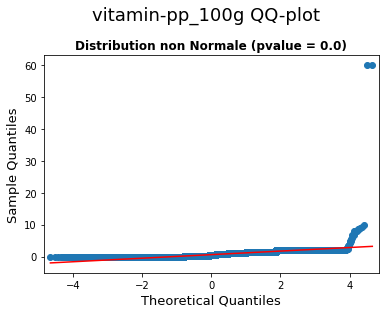

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


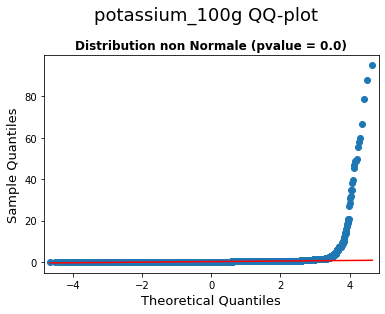

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


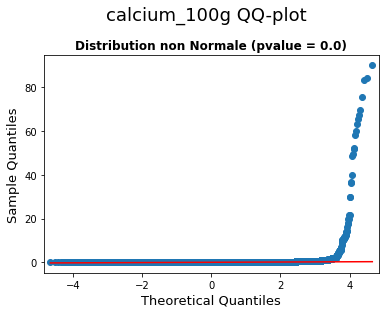

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


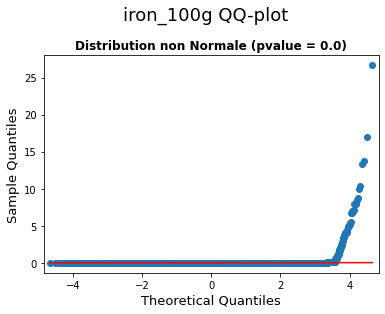

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


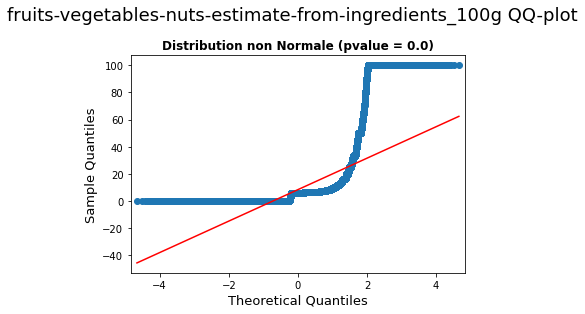

C:\Users\milie\anaconda3\envs\projet3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


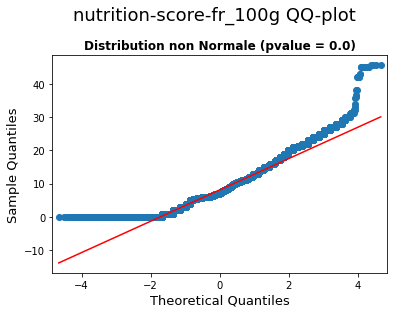

In [74]:
# Affichage des QQ-plots

for c in col_quanti:
    sm.qqplot(data[c], line = "r")
    plt.suptitle(f'{c} QQ-plot', y=1.05, fontsize = 18)
    plt.title(f'{test_normalite(data[c])}', fontsize = 12)
    
    plt.show()

Le test de Normalité de Shapiro-Wilk nous confirme bien qu'aucune distribution n'est Normale.

### Variables qualitatives <a class="anchor" id="quali"></a>

In [75]:
col_quali = data.select_dtypes(include='object').columns.tolist()
col_quali.remove('code')
print(col_quali)

['product_name', 'brands_tags', 'labels_en', 'countries_en', 'ingredients_text', 'allergens', 'additives_en', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']


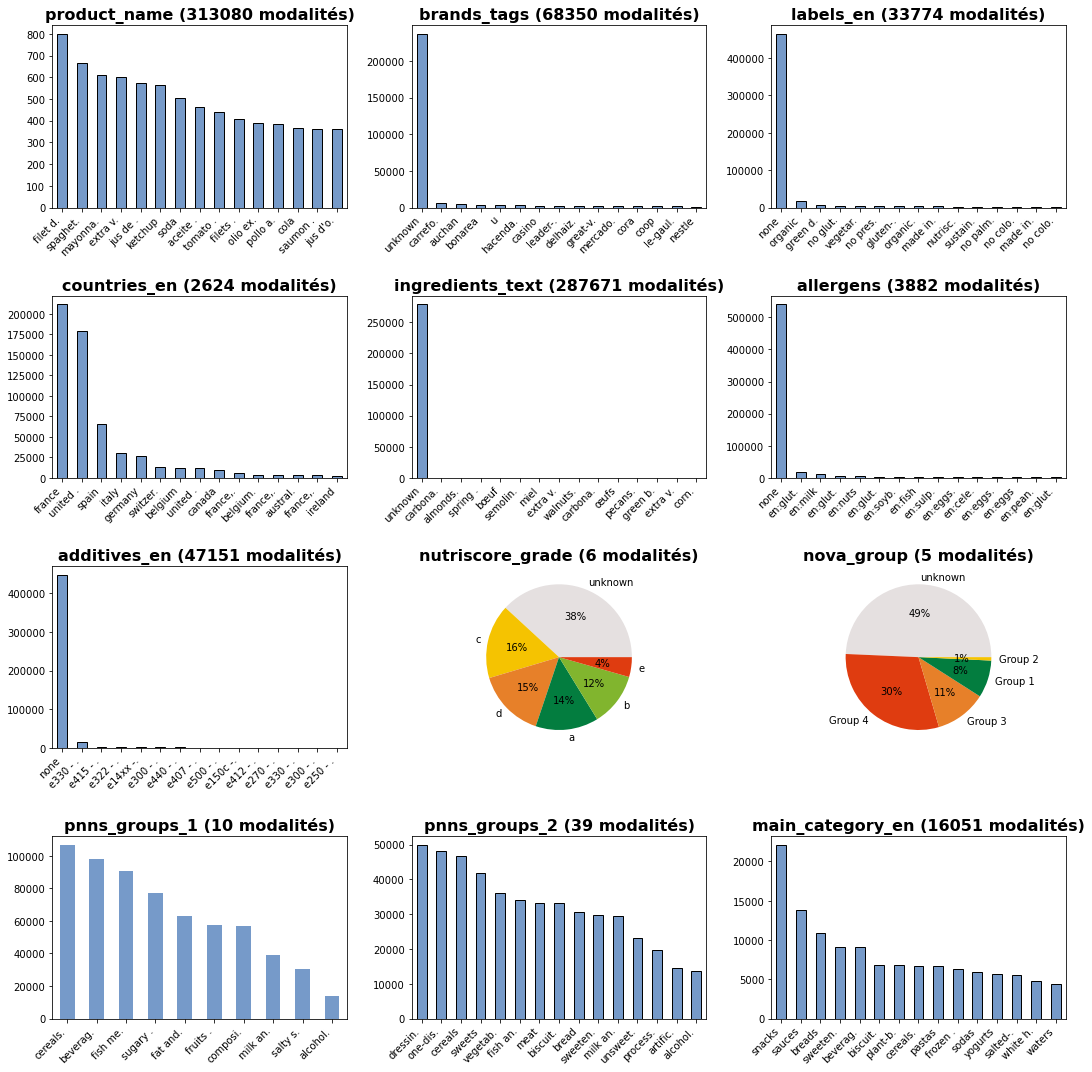

In [100]:
fig = plt.figure(figsize=(15,15))

for i, c in enumerate(col_quali,1):
    ax = fig.add_subplot(4,3,i)
    modalites = data[c].value_counts()
    n_modalites = modalites.shape[0]
    
    if c == 'nutriscore_grade':
        cat_percent = data[c].value_counts(normalize=True) * 100
        values = cat_percent.values
        labels = cat_percent.index
        plt.pie(values, labels = labels, colors = ['#e5e0e0', '#f5c301', '#e78029', '#037d3f', '#81b52e', '#df3c10'], 
                autopct='%.0f%%')
        
    elif c == 'nova_group':
        cat_percent = data[c].value_counts(normalize=True) * 100
        values = cat_percent.values
        labels = cat_percent.index
        plt.pie(values, labels = labels, colors = ['#e5e0e0', '#df3c10', '#e78029', '#037d3f', '#f5c301'], 
                autopct='%.0f%%')
               
    elif n_modalites > 15:
        modalites[0:15].plot.bar(color = '#769ac9',ec='k', ax=ax)
        
    else:
        modalites.plot.bar(color = '#769ac9')
    
    ax.set_title(f'{c} ({n_modalites} modalités)', fontweight='bold')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [l[0:7]+'.' if len(l)>7 else l for l in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout(w_pad=2, h_pad=2)

Certaines variables telles que le nom du produit, la marque, les labels etc ont de très nombreuses modalités. Seules les variables pnns_groups_1, pnns_groups_2, nutriscore_grade ou encore le nova_group ont un nombre limité de modalités et pourraient être utilisées lors de l'analyse bivariée.

## Analyse bivariée <a class="anchor" id="bivar"></a>

### Entre deux variables quantitatives <a class="anchor" id="2_quanti"></a>

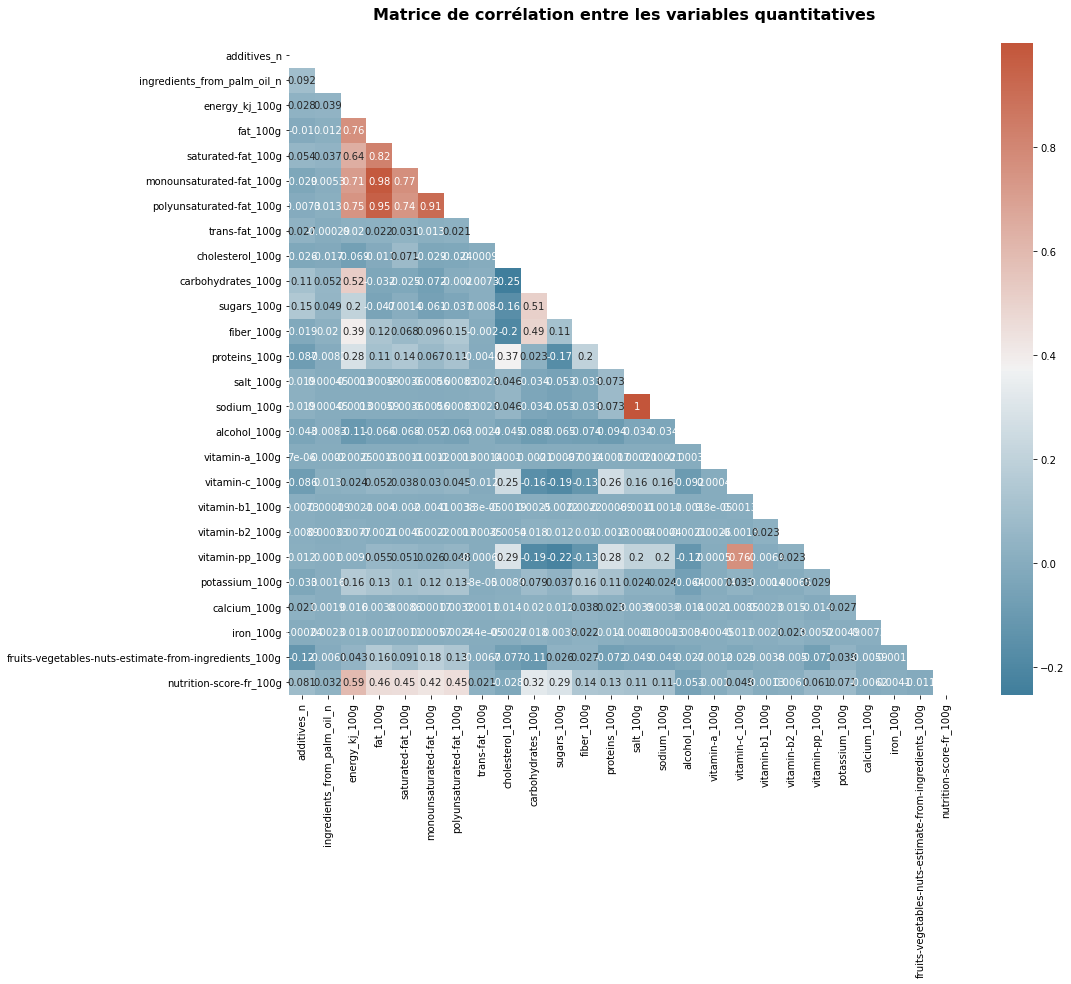

In [104]:
# Corrélation
corr = data.corr()

# Création d'un masque
mask = np.triu(corr)

# Taille du graph
plt.subplots(figsize=(15,12))

# Colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Heatmap avec masque
sns.heatmap(corr, annot = True, mask = mask, cmap=cmap)
plt.title("Matrice de corrélation entre les variables quantitatives\n", fontsize=16);

Comme vu dans la partie cleaning (iterative imputer), les variables les plus corrélées entre elles sont (coeff Pearson > 0.5):

- energy_kj_100g a une forte corrélation avec:
    - fat_100g
    - saturated-fat_100g
    - monounsaturated-fat_100g
    - polyunsaturated-fat_100g
    - carbohydrates_100g
    - nutrition-score-fr_100g
    
- fat_100g a une forte corrélation avec:
    - saturated-fat_100g
    - monounsaturated-fat_100g
    - polyunsaturated-fat_100g
 
- carbohydrates_100g a une forte corrélation avec:
    - sugars_100g

- salt_100g a une forte corrélation avec:
    - sodium_100g

<div class="alert alert-block alert-info">
    <p> Je voulais rajouter une régression linéaire mais pas réussi </p>
</div>

In [157]:
# Fonction permettant d'afficher la droite de régression

def reglin(dataframe, x, y):
    from sklearn.linear_model import LinearRegression
    X = pd.DataFrame(dataframe[x])
    Y = dataframe[y]
    
    myreg = LinearRegression()
    myreg = myreg.fit(X,Y)
    
    plt.plot(X,myreg.predict(X),"-r", linewidth=2)

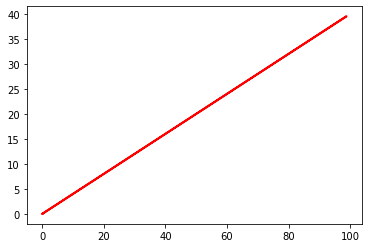

In [158]:
reglin(data, 'salt_100g', 'sodium_100g')

In [152]:
# Fonction permettant d'afficher les nuages de points par groupes de variables

def pairplot(dataframe, col):
    x, y = col
    plt.scatter(dataframe[x], dataframe[y], marker = '.', alpha = 0.3, color = '#769ac9')  
    plt.xlabel(x), plt.ylabel(y)
    plt.text(0.5, 0.9, f'Pearson: {round(dataframe[col].corr().iloc[0,1], 2)}',
        ha = 'center', va = 'center', fontsize=12, c='k', transform = ax.transAxes)

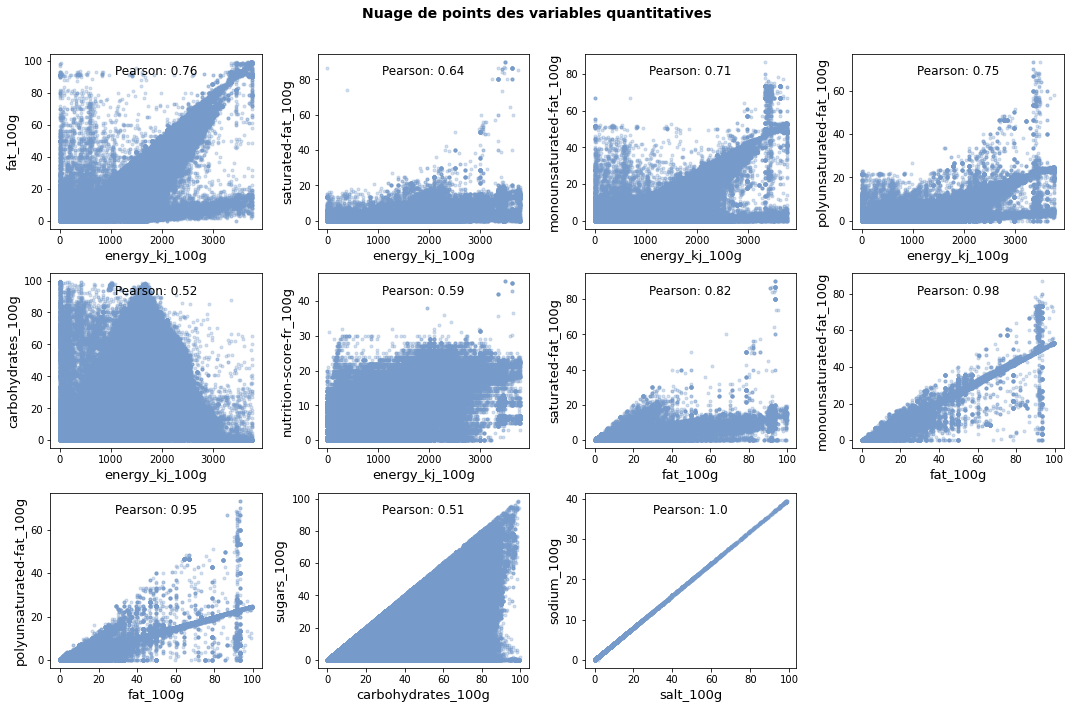

In [160]:
couples_var = {'ener_fat': ['energy_kj_100g', 'fat_100g'],
               'ener_satur_fat': ['energy_kj_100g', 'saturated-fat_100g'],
               'ener_mono_fat': ['energy_kj_100g', 'monounsaturated-fat_100g'],
               'ener_poly_fat': ['energy_kj_100g', 'polyunsaturated-fat_100g'],
               'ener_carb': ['energy_kj_100g', 'carbohydrates_100g'],
               'ener_nutri': ['energy_kj_100g', 'nutrition-score-fr_100g'],
               'fat_satur_fat': ['fat_100g', 'saturated-fat_100g'],
               'fat_mono_fat': ['fat_100g', 'monounsaturated-fat_100g'],
               'fat_poly_fat': ['fat_100g', 'polyunsaturated-fat_100g'],
               'carb_sugars': ['carbohydrates_100g', 'sugars_100g'],
               'salt_sodium': ['salt_100g', 'sodium_100g']}

# Affichage des scatterplots par couples de variables

fig = plt.figure(figsize=(15,10))
for i, c in enumerate(couples_var.items(),1):
    ax = fig.add_subplot(3,4,i)
    pairplot(data,c[1])
    #reglin(data, c[0], c[1])
plt.tight_layout(rect=[0,0,1,0.93])
plt.suptitle('Nuage de points des variables quantitatives',
             fontweight='bold', fontsize=14)
plt.show()

Ces nuages de points nous permettent de visualiser les relations linéaires par couple de variables. Nous nous sommes restreint ici aux coefficients de Pearson > 0.5:
- la variable energy_kj_100g est liée linéairement aux aux lipides, glucides et au nutriscore
- la variable fat_100g est fortement liée linéairement aux variables qui rentrent dans sa composition (graisses saturées, monosaturées, polysaturées)
- les glucides sont liés aux sucres
- le sel et sodium ont une corrélation linéaire très importante

### Entre une variable quantitative et une qualitative <a class="anchor" id="quali_quanti"></a>

#### Catégories d'aliments vs principaux nutriments

Nous allons étudier ici la dispersion des principaux nutriments en fonction des pnns_groups_1 et pnns_groups_2.
J'ai choisi ces 2 catégories d'aliments qui ont l'avantage d'avoir un nombre de modalités peu important et qui représentent bien les types d'aliments.

**pnns_groups_1**

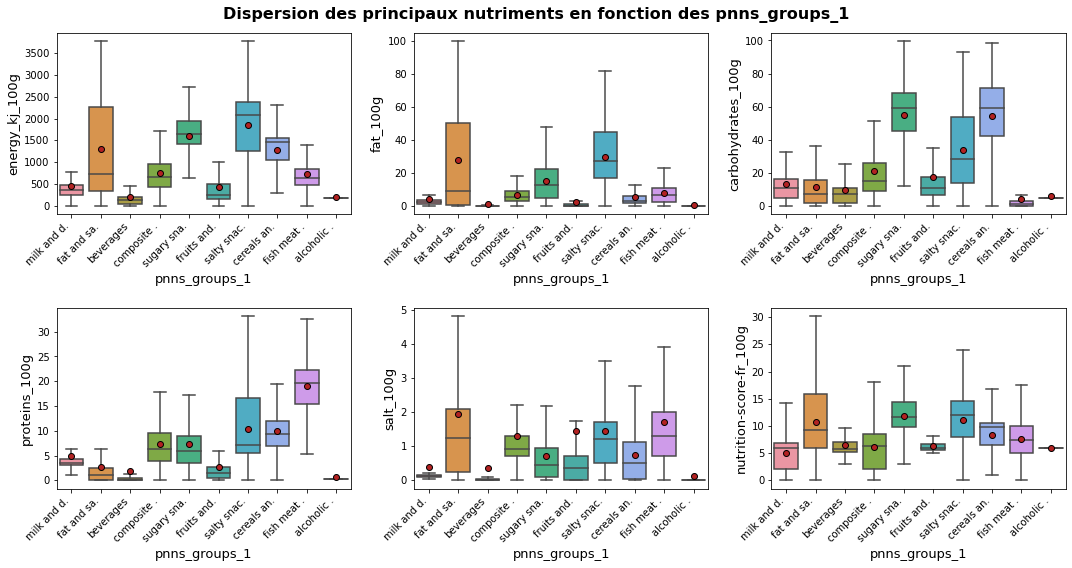

In [185]:
principaux_nutriments = ['energy_kj_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 
                         'salt_100g','nutrition-score-fr_100g']

fig = plt.figure(figsize=(15,8))

for i, c in enumerate(principaux_nutriments,1):
    ax = fig.add_subplot(2,3,i)
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    ax = sns.boxplot(data = data, y = c, x = 'pnns_groups_1', showfliers=False,  showmeans=True, meanprops=meanprops)
    plt.suptitle('Dispersion des principaux nutriments en fonction des pnns_groups_1', fontsize=16,
             fontweight='bold')

    ax.title.set_fontweight('bold')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [l[0:10]+'.' if len(l)>10 else l for l in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout(w_pad=2, h_pad=2)

On voit ici que les valeurs des principaux nutriments sont très différentes d'un pnns_groups_1 à un autre. Par exemple, les lipides pour 100g sont plus dispersés et importants pour la catégorie "fat and sauce" alors qu'ils sont faibles et peu dispersés pour les pnns_groups_1 lait et produits laitiers, boissons, fruits et légumes, ou boissons alcolisées.

Pour savoir si l'on peut prédire correctement les valeurs des principaux nutriments par le pnns_groups_1, notre modèle doit parvenir à expliquer un gros pourcentage des variations des données. Si c'est le cas, cela signifie que les variables pnns_groups_1 et principaux nutriments sont fortement corrélées.

Le test applicable est l'ANOVA à un facteur de comparaison de plus de deux positions. Les conditions d'utilisation de ce test sont:
- les valeurs de chaque échantillon doivent être normalement distribuées
- les variances doivent être égales
Les hypothèses sont:
- H0: μ1 = μ2 = ... = μk
- HA : ] (i,j) tel que μi = μj
- alpha = 0.05

Cependant, comme nous savons que nos données ne sont pas normalement distribuées, nous utiliserons le test non paramétrique de Kruskall-Wallis qui est un test sur la moyenne des rangs. Nous calculerons quand même l'ANOVA mais uniquement à titre informatif.

In [259]:
#liste = ['energy_kj_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g','salt_100g']
liste = ['energy_kj_100g','fat_100g']

for nutri in liste:
    Y = nutri
    X = 'pnns_groups_1'
    test = f"{Y} ~ {X}"
    mod = ols(test, data = data).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(f'------------- ANOVA {nutri} par pnns_groups_1 -------------')
    print()
    print(aov_table)
    print()
    if aov_table['PR(>F)'][0] <= 0.05:
        print("On rejette H0, les moyennes entre les pnns_groups_1 sont différentes")
    else:
        print("On accepte H0, les moyennes entre les pnns_groups_1 sont identiques")
    print()
    print()

------------- ANOVA energy_kj_100g par pnns_groups_1 -------------

                     sum_sq        df             F  PR(>F)
pnns_groups_1  1.686817e+11       9.0  55478.728339     0.0
Residual       2.140444e+11  633585.0           NaN     NaN

On rejette H0, les moyennes entre les pnns_groups_1 sont différentes


------------- ANOVA fat_100g par pnns_groups_1 -------------

                     sum_sq        df             F  PR(>F)
pnns_groups_1  5.133424e+07       9.0  30752.203721     0.0
Residual       1.175150e+08  633585.0           NaN     NaN

On rejette H0, les moyennes entre les pnns_groups_1 sont différentes




In [248]:
mod = ols('fat_100g ~ pnns_groups_1', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
pnns_groups_1,5.133424e+07,9.0,30752.203721,0.0
Residual,1.175150e+08,633585.0,NaN,NaN


In [256]:
aov_table['PR(>F)'][0]

0.0

In [ ]:
def chi2_test(data, var_quali, var_quanti):
    # Contingency table
    tab_cont = pd.crosstab(data[var_quali], disclosures_WD[var_quanti])
    if len(tab_cont[(tab_cont[0] < 5) | (tab_cont[1] < 5)].index.tolist()) > 1:
        print('Observed and expected frequency in each cell < 5 => Chi2 test not valid')
        print('-------------------------------------------------------------------')
        # Checking if conditions are verified
        list_0 = tab_cont[tab_cont[0]<5].index.tolist()
        list_1 = tab_cont[tab_cont[1]<5].index.tolist()
        list_conditions_not_verified = list_0 + list_1
        print(f'{var_quali}(s) to remove before Chi2 test : {list_conditions_not_verified} ')
        print('-------------------------------------------------------------------')
        # Removing countries that don't respect conditions
        tab_cont = tab_cont_country.reset_index()
        tab_cont = tab_cont[~tab_cont[var_quali].isin(list_conditions_not_verified)]
        tab_cont = tab_cont.set_index(var_quali)
        # Running Chi2 test
        print()
        print()
        print()
        print('Observed and expected frequency in each cell > 5 => Chi2 test valid')
        print('-------------------------------------------------------------------')
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(tab_cont) 
        print(f"Chi2: {st_chi2}")
        print(f"Degrees of freedom: {st_dof}")
        print(f"Pvalue (H0 = the variables are independent of each other): {st_p}")
        print('-------------------------------------------------------------------')
        if st_p < 0.05:
            print("We reject H0, the variables are dependant")
        else:
            print("We accept H0, the variables are independant")   
        
        
    else:
        print('Observed and expected frequency in each cell > 5 => Chi2 test valid')
        print('-------------------------------------------------------------------')
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(tab_cont) 
        print(f"Chi2: {st_chi2}")
        print(f"Degrees of freedom: {st_dof}")
        print(f"Pvalue (H0 = the variables are independent of each other): {st_p}")
        print('-------------------------------------------------------------------')
        if st_p < 0.05:
            print("We reject H0, the variables are dependant")
        else:
            print("We accept H0, the variables are independant") 


**pnns_groups_2**

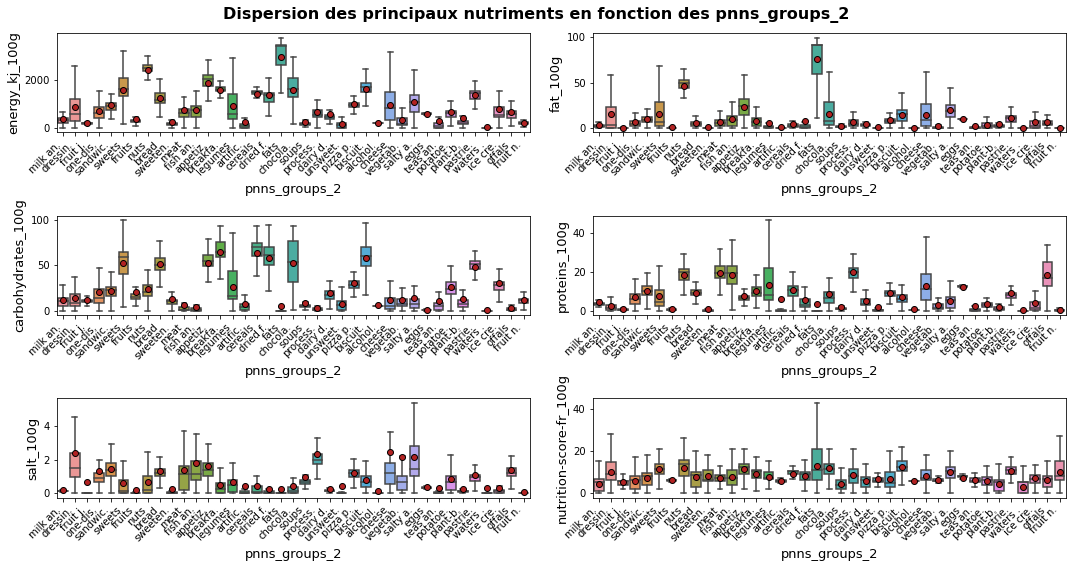

In [186]:
principaux_nutriments = ['energy_kj_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 
                         'salt_100g','nutrition-score-fr_100g']

fig = plt.figure(figsize=(15,8))

for i, c in enumerate(principaux_nutriments,1):
    ax = fig.add_subplot(3,2,i)
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    ax = sns.boxplot(data = data, y = c, x = 'pnns_groups_2', showfliers=False,  showmeans=True, meanprops=meanprops)
    plt.suptitle('Dispersion des principaux nutriments en fonction des pnns_groups_2', fontsize=16,
             fontweight='bold')

    ax.title.set_fontweight('bold')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [l[0:7]+'.' if len(l)>7 else l for l in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout(w_pad=2, h_pad=2)

#### Catégories d'aliments vs nutriscore

#### Nutrigrade vs principaux nutriments

On espère que notre modèle parvienne à expliquer un gros pourcentage des variations des données. Si c'est le cas, cela signifie que les variables nutrigrade et les principaux nutriments sont fortement corrélées

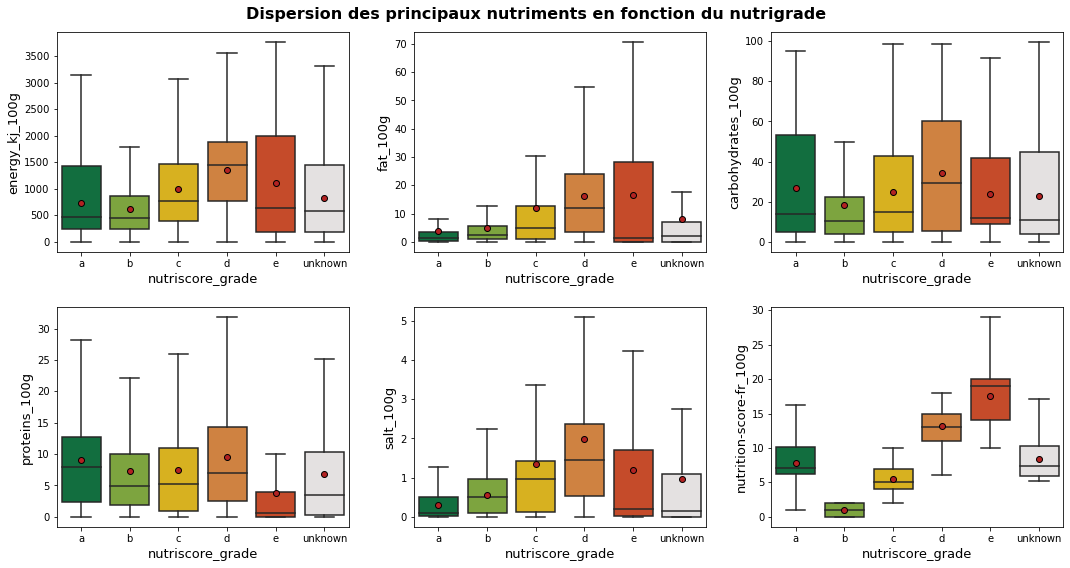

In [187]:
principaux_nutriments = ['energy_kj_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 
                         'salt_100g','nutrition-score-fr_100g']

my_colors = ['#037d3f', '#81b52e', '#f5c301', '#e78029',   '#df3c10', '#e5e0e0']
sns.set_palette(my_colors) 

fig = plt.figure(figsize=(15,8))

for i, c in enumerate(principaux_nutriments,1):
    ax = fig.add_subplot(2,3,i)
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    ax = sns.boxplot(data = data, y = c, x = 'nutriscore_grade', order = ['a', 'b', 'c', 'd', 'e', 'unknown'],
                     showfliers=False,  showmeans=True, meanprops=meanprops)
    plt.suptitle('Dispersion des principaux nutriments en fonction du nutrigrade', fontsize=16,
             fontweight='bold')

    ax.title.set_fontweight('bold')
    
plt.tight_layout(w_pad=2, h_pad=2)

<div class="alert alert-block alert-info">
    <p> Nutrigrade E bizarre. Pas sûre que les méthodes d'imputation des données manquantes soient OK </p>
</div>

#### Marques vs nutriscore

#### TOP 10 Pays vs nutriscore

In [161]:
data.columns

Index(['code', 'product_name', 'brands_tags', 'labels_en', 'countries_en',
       'ingredients_text', 'allergens', 'additives_n', 'additives_en',
       'ingredients_from_palm_oil_n', 'nutriscore_grade', 'nova_group',
       'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'energy_kj_100g',
       'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g',
       'vitamin-pp_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

### Entre deux variables qualitatives <a class="anchor" id="quali_quali"></a>

In [ ]:
#### Analyse en Composantes Principales

In [ ]:
openfoodfacts_nan.columns[openfoodfacts_nan.columns.str.endswith('100g')]

In [ ]:
# Sélection des colonnes à prendre en compte dans l'ACP et remplissage des NaN par la moyenne
liste_col_pca = ['energy_kj_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g',
       'potassium_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g']
data_pca = openfoodfacts_nan[liste_col_pca]
X = data_pca.fillna(data_pca.mean()) # fréquent de remplacer les NaN par la moyenne

In [ ]:
# Préparation des données pour l'ACP
keep_ind = X.index
X = StandardScaler().fit_transform(X)

In [ ]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

In [ ]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [ ]:
display_scree_plot(pca)

In [ ]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(15,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [ ]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, 4, pca, [(0,1), (2,3)], labels = np.array(liste_col_pca))